# Модуль B

In [ ]:
import pandas as pd

data_filtered = pd.read_csv('rotation_prepared.csv')
data_filtered = data_filtered.drop(['Unnamed: 0'], axis = 1)
data_filtered

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,2,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


Масшстабирование данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y = data_filtered['Rotational speed [rpm]']
X = data_filtered.drop(['Rotational speed [rpm]', 'Product ID'], axis=1)

scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=scaler.get_feature_names_out())
scaled_X

,UDI,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,-1.731878,1.333889,-0.952389,-0.947360,0.282200,-1.695984,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
1,-1.731531,-0.332223,-0.902393,-0.879959,0.633308,-1.648852,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
2,-1.731185,-0.332223,-0.952389,-1.014761,0.944290,-1.617430,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
3,-1.730838,-0.332223,-0.902393,-0.947360,-0.048845,-1.586009,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
4,-1.730492,-0.332223,-0.902393,-0.879959,0.001313,-1.554588,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,1.333889,-0.602417,-1.082162,-1.052012,-1.476034,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9996,1.730838,-1.998335,-0.552421,-1.082162,-0.821283,-1.428902,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9997,1.731185,1.333889,-0.502425,-0.947360,-0.660777,-1.350349,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9998,1.731531,-1.998335,-0.502425,-0.879959,0.854005,-1.303217,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363


Понижение размерности

<BarContainer object of 12 artists>

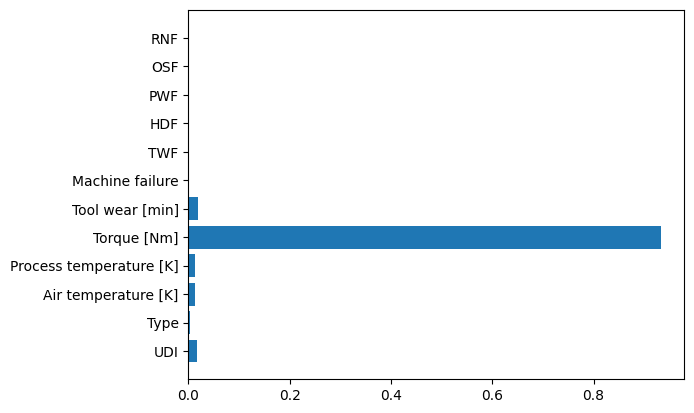

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

tree = DecisionTreeRegressor().fit(scaled_X, y)

plt.barh(width=tree.feature_importances_, y =X.columns )

Оставляем 5 признаков

In [ ]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(k=5)
skb_x = skb.fit_transform(scaled_X, y)
skb_X = pd.DataFrame(skb_x, columns=skb.get_feature_names_out())
skb_X

,Torque [Nm],Machine failure,HDF,PWF,OSF
0,0.282200,-0.187322,-0.10786,-0.097934,-0.099484
1,0.633308,-0.187322,-0.10786,-0.097934,-0.099484
2,0.944290,-0.187322,-0.10786,-0.097934,-0.099484
3,-0.048845,-0.187322,-0.10786,-0.097934,-0.099484
4,0.001313,-0.187322,-0.10786,-0.097934,-0.099484
...,...,...,...,...,...
9995,-1.052012,-0.187322,-0.10786,-0.097934,-0.099484
9996,-0.821283,-0.187322,-0.10786,-0.097934,-0.099484
9997,-0.660777,-0.187322,-0.10786,-0.097934,-0.099484
9998,0.854005,-0.187322,-0.10786,-0.097934,-0.099484


In [ ]:
all_df = pd.concat([skb_X, y], axis=1)
all_df

,Torque [Nm],Machine failure,HDF,PWF,OSF,Rotational speed [rpm]
0,0.282200,-0.187322,-0.10786,-0.097934,-0.099484,1551
1,0.633308,-0.187322,-0.10786,-0.097934,-0.099484,1408
2,0.944290,-0.187322,-0.10786,-0.097934,-0.099484,1498
3,-0.048845,-0.187322,-0.10786,-0.097934,-0.099484,1433
4,0.001313,-0.187322,-0.10786,-0.097934,-0.099484,1408
...,...,...,...,...,...,...
9995,-1.052012,-0.187322,-0.10786,-0.097934,-0.099484,1604
9996,-0.821283,-0.187322,-0.10786,-0.097934,-0.099484,1632
9997,-0.660777,-0.187322,-0.10786,-0.097934,-0.099484,1645
9998,0.854005,-0.187322,-0.10786,-0.097934,-0.099484,1408


## Выбор модели ML

Используем 3 модели регрессии:

1) Линейная регрессия

2) DecisionTreeRegressor

3) GradientBoostingRegressor

Данные регрессоры были выбраны из-за неочевидности линейной зависимости целевого признака от переменных. Да, Скорость вращения сильно зависит от крутящего момента (проверим точностью модели линейной регрессии), но также есть факторы как различные поломки (нам помогут DecisionTreeRegressor и GradientBoostingRegressor)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(skb_X, y, test_size=0.2)



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_metrics(y_test, y_pred):
  print(f'MSE: {mean_squared_error(y_test, y_pred)}')
  print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
  print(f'R2: {r2_score(y_test, y_pred)}')

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
get_metrics(y_test, y_pred)


MSE: 6041.936598874428
MAE: 58.050056461190444
R2: 0.8050832524531316


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
}

rscv = RandomizedSearchCV(LinearRegression(), params, cv=5, n_iter=10)
rscv.fit(X_train, y_train)

best_params = rscv.best_params_
best_lr = rscv.best_estimator_

print(best_params)

best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)
get_metrics(y_test, y_pred)

{'fit_intercept': True, 'copy_X': True}
MSE: 6041.936598874428
MAE: 58.050056461190444
R2: 0.8050832524531316


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeRegressor

ltree = DecisionTreeRegressor()

ltree.fit(X_train, y_train)
y_pred = ltree.predict(X_test)
get_metrics(y_test, y_pred)


MSE: 2735.482551426109
MAE: 41.49962114829561
R2: 0.9117515794530985


In [ ]:
params = {
    'criterion' :['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth' : list(range(1, 11))
}

rscv = RandomizedSearchCV(DecisionTreeRegressor(), params, cv=5, n_iter=10)
rscv.fit(X_train, y_train)

best_params = rscv.best_params_
best_tree = rscv.best_estimator_

print(best_params)

best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)
get_metrics(y_test, y_pred)

{'max_depth': 6, 'criterion': 'poisson'}
MSE: 2581.0514883759165
MAE: 40.28357288722486
R2: 0.9167336245370467


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
get_metrics(y_test, y_pred)

MSE: 2544.689450162347
MAE: 39.91543685462498
R2: 0.9179066871977976


In [ ]:
params = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'max_depth' : list(range(1, 11, 2)),
    'n_estimators': [100, 200, 300, 500],
}

rscv = RandomizedSearchCV(GradientBoostingRegressor(), params, cv=5, n_iter=5)
rscv.fit(X_train, y_train)

best_params = rscv.best_params_
best_gbr = rscv.best_estimator_

print(best_params)

best_gbr.fit(X_train, y_train)
y_pred = best_gbr.predict(X_test)
get_metrics(y_test, y_pred)

{'n_estimators': 500, 'max_depth': 1, 'loss': 'huber'}
MSE: 2574.357091319844
MAE: 40.22065754331086
R2: 0.9169495900771684


###  Вывод:

Наилучшая модель - GradientBoostingRegressor (с минимальным MSE = 2544)

Произведем деплой этой модели

In [ ]:
my_line = pd.DataFrame(columns=['Torque [Nm]',	'Machine failure',	'HDF',	'PWF',	'OSF'], data=[[45, 0, 1, 0, 1]])

scaled_my_line = scaler.fit_transform(my_line)

prediction = best_gbr.predict(scaled_my_line)[0]
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


np.float64(1498.0285559670267)